In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import math

class TSP():
    cities = 0
    distances = []
    locations = []
    
    def distance(self, c1, c2):
        loc1, loc2 = self.locations[c1], self.locations[c2]
        return math.sqrt((loc1[0]-loc2[0])**2 + (loc1[1]-loc2[1])**2)
    
    def __init__(self, cities, seed=1):
        random.seed(seed)
        self.cities = cities
        
        self.locations = []
        for i in range(cities):
            self.locations.append((random.random(), random.random()))
        
        self.distances = []
        for i in range(cities):
            self.distances.append([])
            for j in range(cities):
                self.distances[i].append(self.distance(i, j))
                
    def random_solution(self):
        s = [i for i in range(self.cities)]
        random.shuffle(s)
        return s
    
    def evaluate(self, s):
        fit = 0
        for i in range(len(s)):
            fit += self.distances[s[i]][s[i+1 if i+1<len(s) else 0]]
        return fit
    
    def mutate(self, s):
        sol = s[:]
        c1, c2 = random.sample(range(0, self.cities), 2)
        if c2 < c1:
            ctmp = c1
            c1 = c2
            c2 = ctmp
        rev = sol[c1:c2+1]
        rev.reverse()
        sol[c1:c2+1] = rev
        return sol
    
    def crossover(self, s1, s2):
        sol1, sol2 = s1[:], s2[:]
        c1, c2 = random.sample(range(0, self.cities), 2)
        if c2 < c1:
            ctmp = c1
            c1 = c2
            c2 = ctmp
        sol1[c1:c2+1] = list(filter(lambda x: x in sol1[c1:c2+1], s2))
        sol2[c1:c2+1] = list(filter(lambda x: x in sol2[c1:c2+1], s1))
        
        return sol1, sol2
    
    def display_solution_param(self, solution):
        fig, ax = plt.subplots(figsize=(8, 8))

        x = [i[1] for i in [self.locations[c] for c in solution]]
        y = [i[0] for i in [self.locations[c] for c in solution]]
        x.append(x[0])
        y.append(y[0])
        line, = ax.plot(x, y, 'go-',linewidth=2)
            
        plt.xlim((-0.03,1.03))
        plt.ylim((-0.03,1.03))
        plt.show()

**Task 1:** Implement the generational evolutionary algorithm with tournament selection. Let it be parametrized with four parameters: the size of the population $N$, the size of the tournament $t$, the probability of mutation $p_m$ and the probability of crossover $p_c$. The algorithm should terminate automatically after 50 generations with no improvement.

In [10]:
def chance(probability):
    return random.random() < probability

class EvolutionaryAlgorithm:
    def __init__(self, problem, population_size=100, crossover_prob=0.75, mutation_prob=0.15, tournament_size=3):
        self.problem = problem
        self.population_size = population_size
        self.crossover_prob = crossover_prob
        self.mutation_prob = mutation_prob
        self.tournament_size = tournament_size
    
    def initial_population(self):
        return [self.problem.random_solution() for _ in range(self.population_size)]
    
    def tournament(self, number=1):
        return [
            self.best_solution(
                random.sample(self.population, self.tournament_size)
            ) for _ in range(number)
        ]
    
    def next_solutions(self):
        if chance(self.crossover_prob):
            return self.select_with_crossover()
        else:
            return self.select_without_crossover()
    
    def select_with_crossover(self):
        parent1, parent2 = self.tournament(2)
        children = self.problem.crossover(parent1, parent2)
        return self.possibly_mutate_each(children)
    
    def select_without_crossover(self):
        return self.possibly_mutate_each(self.tournament())
    
    def possibly_mutate_each(self, solutions):
        return [
            self.problem.mutate(solution)
            if chance(self.mutation_prob)
            else solution
            for solution
            in solutions
        ]
    
    def evolve(self):
        next_population = []
        while len(next_population) < self.population_size:
            next_population.extend(self.next_solutions())
        self.population = next_population[0:self.population_size]
    
    def best_solution(self, solutions):
        return min(
            solutions,
            key=self.problem.evaluate
        )
    
    def optimize(self):
        self.population = self.initial_population()
        best_fitness = float('inf')
        generations_without_improvement = 0
        while generations_without_improvement < 50:
            self.evolve()
            best_solution = self.best_solution(self.population)
            fitness = self.problem.evaluate(best_solution)
            if fitness < best_fitness:
                best_fitness = fitness
                generations_without_improvement = 0
            else:
                generations_without_improvement += 1
        return best_solution

**Task 2:**

* What is the role of a mutation operator in evolutionary algorithms?
* What are the properties of a good mutation operator?
* What is the role of a crossover operator in evolutionary algorithms?
* What are the properties of a good crossover operator?
* What is the role of a cloning operator in evolutionary algorithms?
* What are the properties of a good genetic representation?
* How can you tell that the population has converged?
* How do the parameters of the evolutionary algorithm affect the speed of its convergence?
* Does the speed of the algorithm's convergence correlate with the quality of the solutions? What is the reason?
* Can a population escape from a local optimum once it has converged?


* What are the strengths of the evolutionary algorithms?
* What are the weaknesses of the evolutionary algorithms?
* What changes would you introduce to the evolutionary algorithms?
* Which problems are evolutionary algorithms best suited for?

4.258790004734686


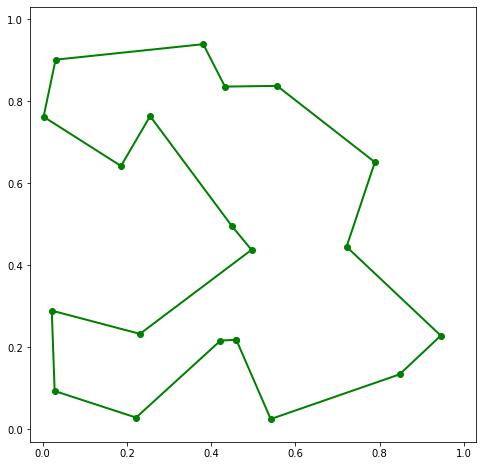

In [11]:
problem = TSP(20)
ea = EvolutionaryAlgorithm(problem)
solution = ea.optimize()
print(problem.evaluate(solution))
problem.display_solution_param(solution)

**Task 3:** Implement the QAP (https://en.wikipedia.org/wiki/Quadratic_assignment_problem). Use EA to solve it.

In [24]:
class QAP():
    
    def __init__(self, seed=1):
        random.seed(seed)
        #TODO
                
    def random_solution(self):
        s = []
        #TODO
        
        return s
    
    def evaluate(self, s):
        fit = 0
        #TODO
        
        return fit
    
    def mutate(self, s):
        sol = s[:]
        #TODO
        
        return sol
    
    def crossover(self, s1, s2):
        sol1, sol2 = s1[:], s2[:]
        #TODO
        
        return sol1, sol2

**Task 4:** Choose one of the problems (TSP or QAP). Assume a constant number of fitness evaluations per each evolutionary run. For a sufficiently big (nontrivial) problem:

a) Assume $N = 200$, $t = 5$. Prepare a heatmap illustrating the influence of values of $p_m$ and $p_c$ on the quality of the solution.

b) Assume $p_m = 0.5$, $p_c = 0.5$. Prepare a heatmap illustrating the influence of values of $N$ and $t$ on the quality of the solution.

Discuss the results. Can we expect to see similar results under different search termination conditions (e.g. a number of iterations with no improvement)? Can we expect to see similar results for different optimization problems?